**Ensamble**

**Daniela Calle**

Para llevar a cabo este trabajo utilizamos la plataforma de **NCBI** en donde descargamos el ejemplo 6 dado en clase por el profesor **ID:** SAMN32886984
**Link:** https://www.ncbi.nlm.nih.gov/sra/SRX19387393[accn]

Después de descargar el ejemplo, ingresamos a Apolo y cargamos la siguiente línea de comando: 




In [ ]:
scp /Users/Awkward/Downloads/seq_dct.fastq dcallet@apolo.eafit.edu.co:/home/dniela_calle/slurm


Luego se activo el ambiente de conda, el cual fue creado previamente para el ensamble. 

In [ ]:
conda activate kneumo_ensamble

Procedemos a correr la siguiente linea de comando:

In [ ]:
fastqc seq_dct.fastq

Una vez hayamos corrido el comando tendremos un archivo llamado **seq_dct_fastqc.html**, este archivo debemos extraerlo de Apolo utilizando la siguiente linea de comando:

In [ ]:
scp dcallet@apolo.eafit.edu.co:/home/dcallet/daniela_calle/seq_dct_fastqc.html .

Una vez descargada la información abrimos el archivo **.HTML** y obtendremos el siguiente gráfico: 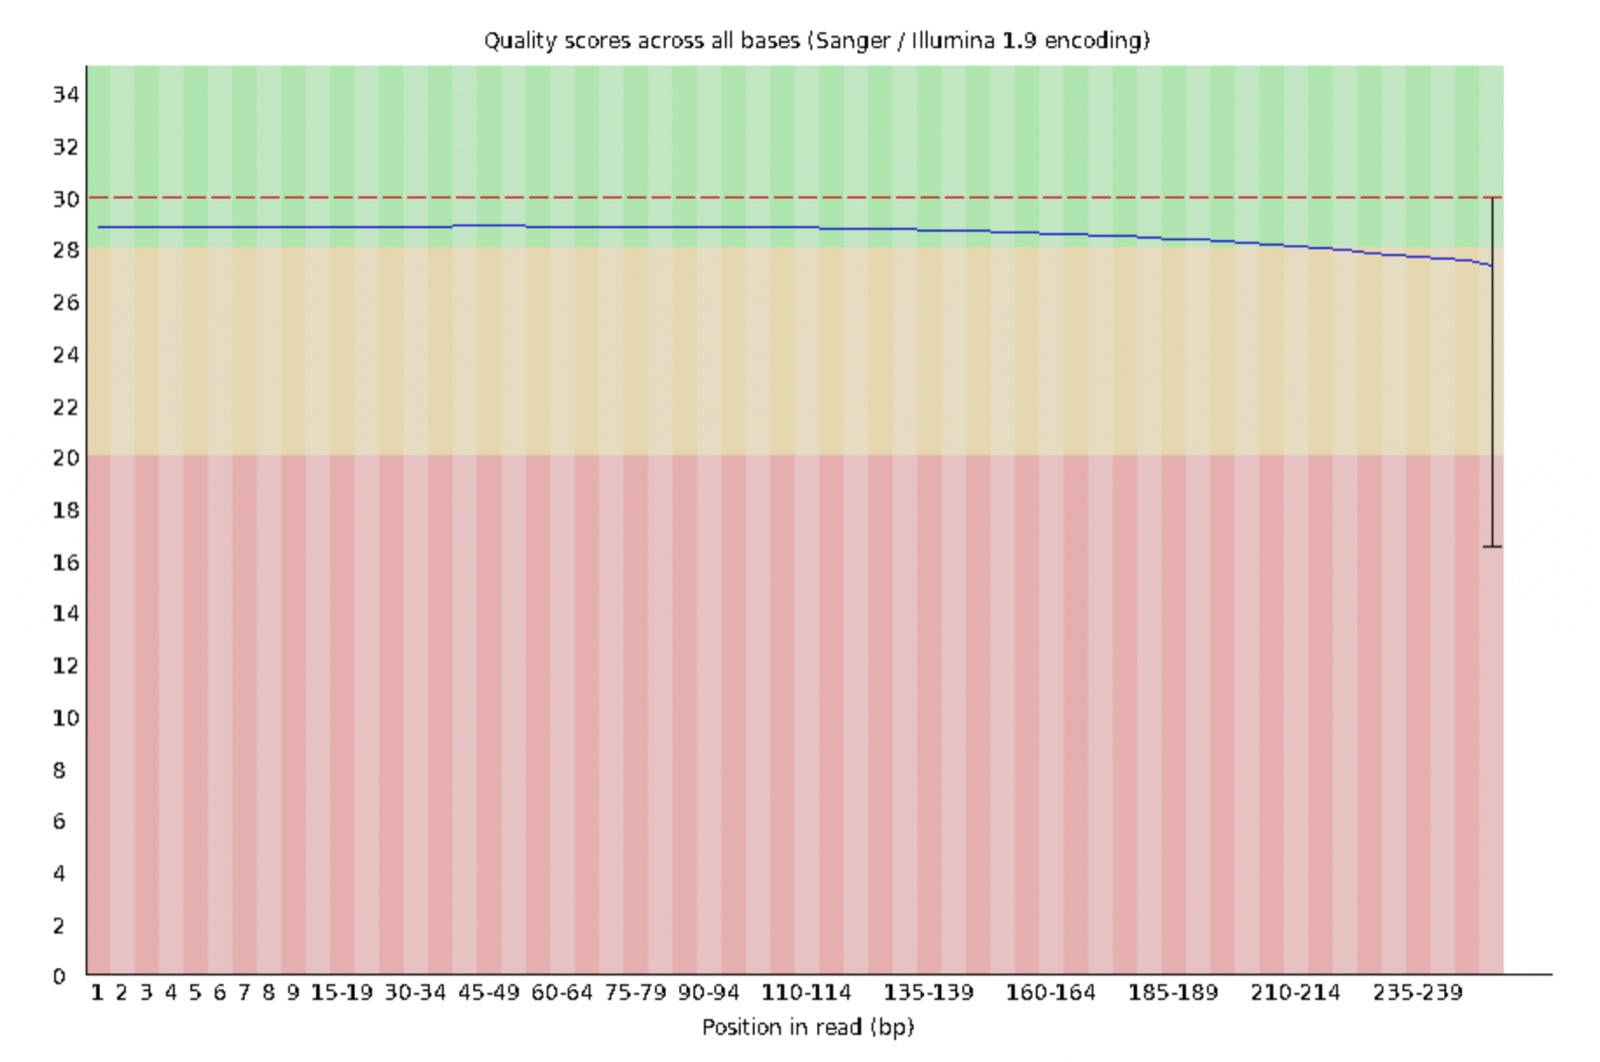

En este grafico podemos observar que el ensamble tiene una muy buena calidad en las primeras posiciones, sin embargo, en la medida que van avanzando podemos ver como va perdiendo su calidad. Con el fin de mejorar su calidad, realizaremos un proceso de trimado utilizando Apolo y la siguiente linea de comando:

In [ ]:
trimmomatic SE -phred33 seq_dct.fastq seq_trimada_dct.fastq SLIDINGWINDOW:4:20 MINLEN:25

Después de eso, debemos correr el siguiente comando: 

In [ ]:
fastqc seq_trimada_dct.fastq

Una vez hayamos corrido el comando tendremos un archivo llamado **seq_trimada_dct_fastqc.html**, este archivo debemos extraerlo de Apolo utilizando la siguiente linea de comando:

In [ ]:
scp dcallet@apolo.eafit.edu.co:/home/dcallet/daniela_calle/seq_trimada_dct_fastqc.html .

Después de realizar este proceso, tenemos una nueva grafica en donde podemos observar una gran mejoría con respecto a la grafica pasada en terminos de calidad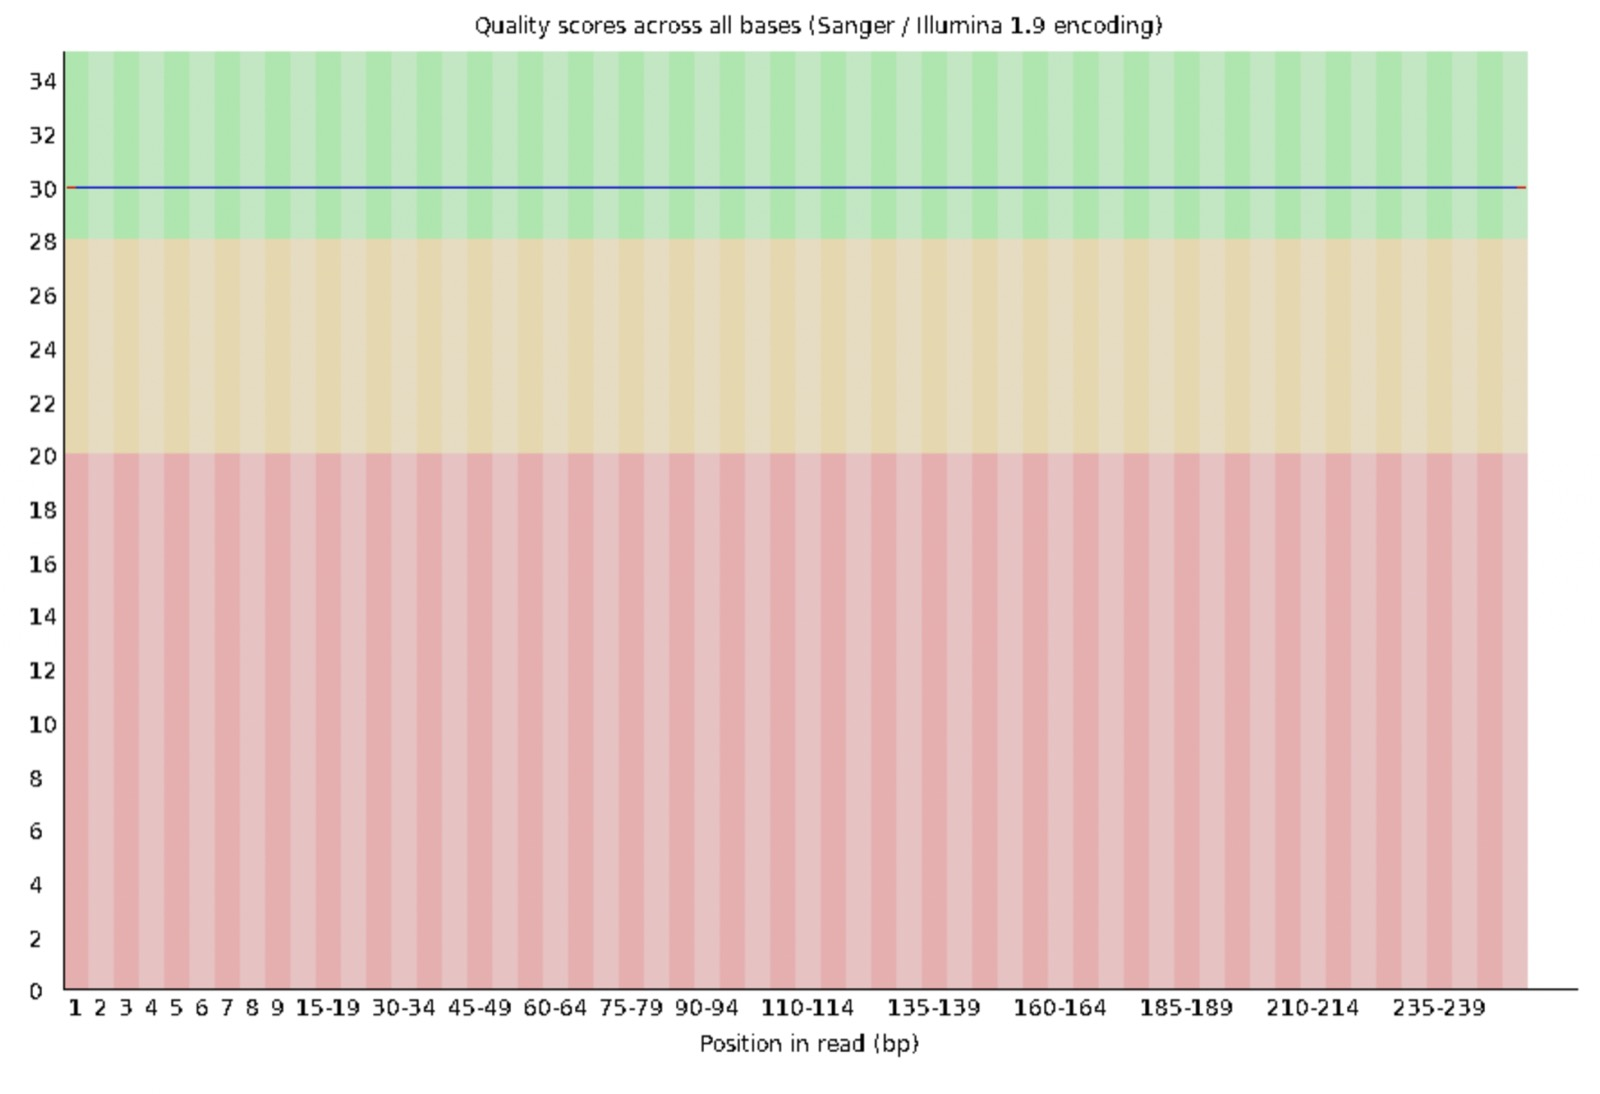



En esta grafica podemos ver que después de realizar el proceso se logro tener una muy buena calidad y que ya no es necesario realizar el proceso de trimado nuevamente, por lo cuál procedemos a realizar el ensamble con diferentes tipos de kmers, el script utilizado es el siguiente:

In [ ]:
abyss-pe se=seq_trimada_dct.fastq k=10 name=ensamble20


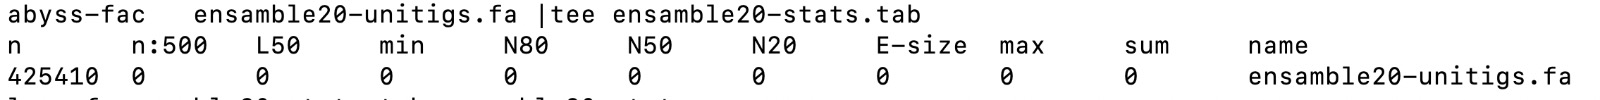

Como podemos observar, el resultado que tuvimos no fue muy contundente a la hora de brindar información, esto se puede deber a que el número de kmers fue muy bajo.
Es por esta razón que decidimos aumentar el número de kmers para tener una información mucho más completa, para esto utilizamos la siguiente línea de código:

In [ ]:
abyss-pe se=seq_trimada_dct.fastq k=50 name=ensamble30


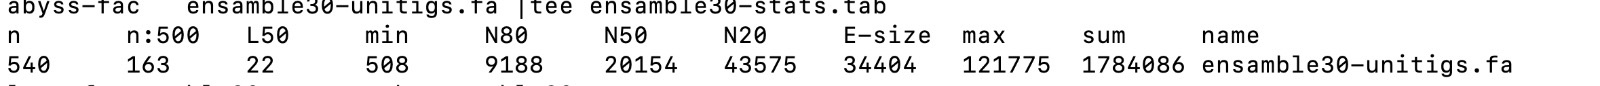

En este caso utilizamos kmers=50 y con esto obtuvimos una mejoría en los resultados, para este caso puntual el L50 fue de 22, por lo cuál, podríamos decir que la secuencia pudo ser emsamblada. Después decidimos probar con 100 kmers y el resultado fue el siguiente:

In [ ]:
abyss-pe se=seq_trimada_dct.fastq k=100 name=ensamble40


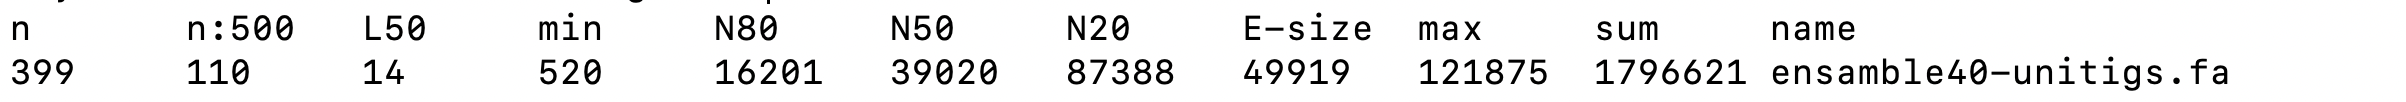

Como se puede observar el resultado que nos arroja el script es de L50=14 lo que indica que el ensamble tuvo una mejora considerable. Para poder validar si los valores obtenidos en nuestro experimento o son similares a los obtenidos directamente en el NCBI utilizamos la siguiente tabla:

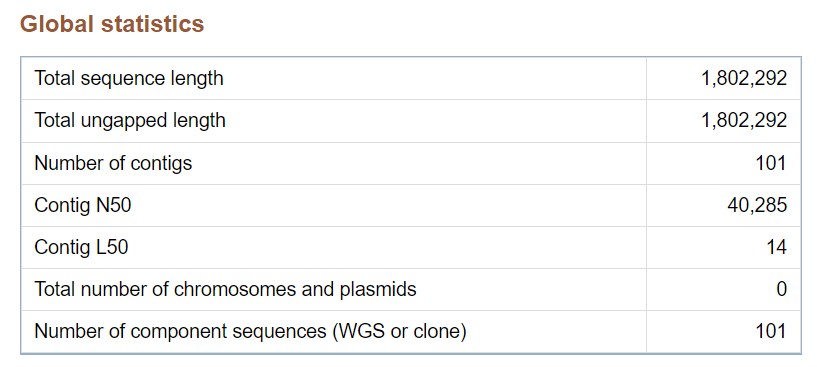


En este caso podemos observar que nuestro L50 es igual al obtenido en el NCBI revisando las estadisticas globales, esto quiere decir que nuestro ensemable con 100 kmers fu el ideal para obtener el mismo resultado y que el ensamble fue exitoso y que la calidad de la secuencia fue optima. 